# Explanations on Part 1 :


For this exercise we are going to study the growth factor for Gaussian Elimination with partial pivoting. We consider the factorization PA=LU and also we use the definition of Growth factor which is the maximum value of the upper triangular Matrix’s entries over the maximum value of our initial matrix A.
 

For the first step we define a function “ran.gen” which as the exercise desires, is a function that takes n as a parameter and produces $n\times n$ matrices and the entries of such these matrices are random numbers with a normal distributions. Then for this exercise I will consider $ \mu=0 $ and $\sigma=1$ (which is define at line 6).

Next I will introduce and use the function “gepp” which is a short for Gaussian Elimination Partial pivoting, this function Implement Gaussian Elimination with Partial Pivoting on these matrices which are produced in previous step.

For this step I chose n=8 to n=1024 and the step size=2. I chose these number of matrices because at the end when I want to fit a line on the points which are related to growth factor of these random matrices, the density of these points would be more and this means that I am able to control the error from being accumulated or increased.

In the next step I will plot the growth factor against the matrix size of course in logarithmic scale, and the matrices are produced before. At line 32 for growth factor value, I used a python library which computes (performs) partial pivoting and its name is “LU package” (With this step size the demand would be more than the demand at line 33 ).

we know that we should estimate the $\alpha$ in the desired relation so we take log from both side and we have log $g = log c +\alpha \times log n $. so the $\alpha=\frac{1}{2}$ is the slope of this line and we will estimate it first by a function “Polyfit” with which the program will fit a line on the points showing the growth factor of a large variety of matrices and then we can see that the program fits a line on the points which show the growth factor of different matrices, and the slope of this line or *alpha*is estimated as $\alpha=\frac{1}{2}$.

From line 38 to 50 we do this (fitting a line on the points ) to guess or estimate the amount of  $\alpha$ as the slope of the line. After that we use function “Plot” to plot the growth factor against the matrix size in logarithmic scale.

Beside this we will also plot the graph $2^{n}$ which is the worst case for partial pivoting, and we compare these two graphs and we will see that the observed plot of growth factor grows linearly but it grows with $log n$ or $\sqrt{n}$ it means that this growing the slowest case in comparison with $2^{n}$ and also lies well below the worst-case ,but the worst case grows exponentially which is much faster. James Wilkinson showed in the early 1960s that the numerical stability of Gaussian elimination depends on the growth factor and we can conclude that with this, our numerical computation is more stable than the case $2^{n}$.


From line 52 to the end we plot the probability density function against the growth factor with n=16. I will produce approximately 4000 random matrices with normal distribution and by considering $\mu=0$ and $\sigma=1$ and for every single matrix I will calculate the growth factor and as I said before I marked them with red points (small stars), After that I subdivide the value-space of the growth factors into small subintervals of equal length, for my program this length is equal to 0.1.  then the program will count that how many matrices with growth factor lying in these subinterval. And at the end we produce an approximation of the probability density function of the growth factor (Histogram Technique) and we will plot it against the growth factor. At line 66 the distribution function is computing the probability distribution of the growth factor. 

We can see from the graph that" 
1) this histogram has a peak, approximately about 1.7 .
2) or statistically it is stated as “Right skewed distribution” because by the definition : The skewed distribution is asymmetrical because a natural limit prevents outcomes on one side. The distribution’s peak is off center toward the limit and a tail stretches away from it. And so If the data are right-skewed, then the mean is typically GREATER THAN the median. we can’t see exactly what the specific values are for the minimum and maximum, like we can on an individual value plot. However, we can still observe an approximation for the range and see how spread out the data are. 


As we can observe for n=16 we produced thousands matrices and computed their growth factor, the Majority of these random matrices of dimension 16 have the growth  factor between 1.4 to 2.2 and their probability of these ranges are between 0.6 and 1.7. it means that for example the probability of those matrices which have the growth factor of between 1.9 and 2 is approximately 65% ( I know that these numbers are round and inexact but I think it’s just a conjecture) and also as you can see after the growth factor of about 2.3 the probability of matrices which have the growth factor of larger than 2.3 decreases very fast until the growth factor of 4 and after that the probability reaches to 0. I should add that after the growth factor of 7 we have another peak but the probability is again after 7 but the probability is again in aforementioned interval.


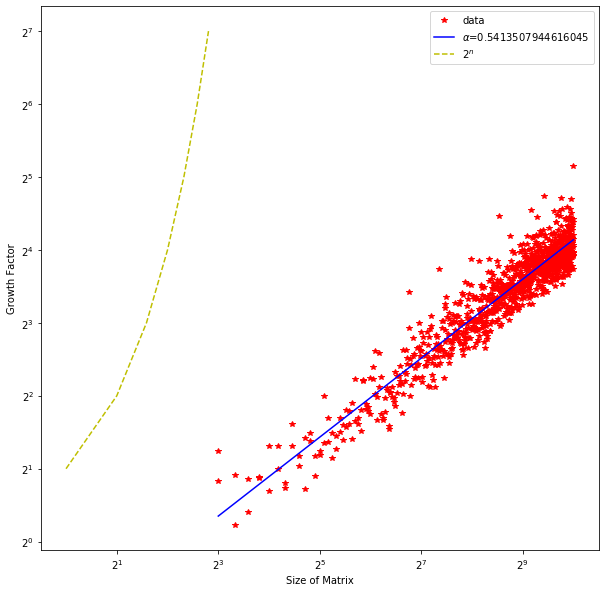

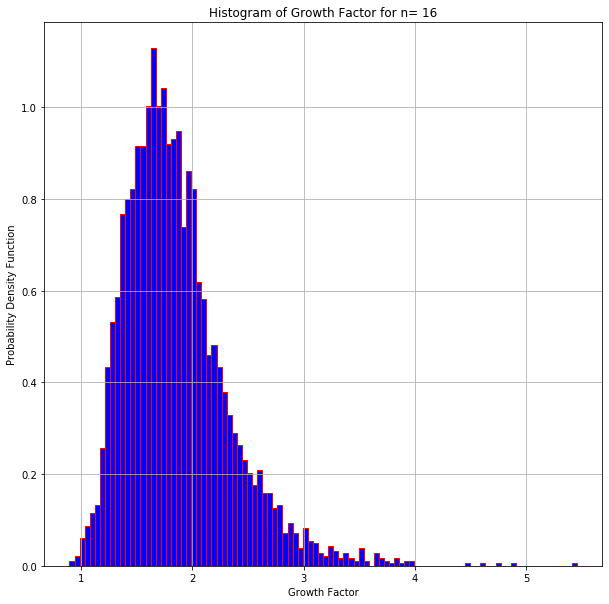

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu


mu, sigma = 0, 1 # mean and standard deviation

def ran_gen(n):
    s = np.random.normal(mu, sigma, n*n)
    return s.reshape(n,n)

def GEPP(A):
    '''
    Gaussian elimination with partial pivoting.

    '''
    n = len(A)
    doPricing = True
    for k in range(n-1):
        for row in range(k+1, n):
            multiplier = A[row,k]/A[k,k]
            A[row, k:] = A[row, k:] - multiplier*A[k, k:]
    return A

n= []
gf = []

for i in range(8,1024,2):
    for q in range(2):
        z = ran_gen(i)
        d = max(z.max(), np.abs(z.min()))
        L, U, z = lu(z)
        #z = GEPP(z)
        u = max(z.max(), np.abs(z.min()))
        gf.append(u/d)
        n.append(i)
    
#fitting part
n_log = np.log(n)
gf_log = np.log(gf)
coef = np.polyfit(n_log, gf_log, 1)
plt.figure(figsize =[10,10])
plt.plot(n, gf, '*r', label = 'data')
plt.plot(n, np.exp(coef[1])*n**coef[0], '-b', label = '$\\alpha$='+str(coef[0]))
plt.plot(range(1,8),[2**float(i) for i in range(1,8)],'--y', label = '$2^{n}$')
plt.legend()
plt.xscale('log', basex=2)
plt.yscale('log', basey=2) 
plt.ylabel("Growth Factor")
plt.xlabel("Size of Matrix")

#histgram for fixed n
plt.figure(figsize =[10,10])
n=16
gf=[]
for i in range(4000):
    z = ran_gen(n)
    d = max(z.max(), np.abs(z.min()))
    L, U, z = lu(z)
    #z = GEPP(z)
    u = max(z.max(), np.abs(z.min()))
    gf.append(u/d)
    
n, bins, patches = plt.hist(gf, 100, density=True, facecolor='b', edgecolor='r')    
plt.xlabel('Growth Factor')
plt.ylabel('Probability Density Function')
plt.title('Histogram of Growth Factor for n= 16')
plt.grid(True)
plt.show()